#### Initialize variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

grades = [88, np.NaN, 100, 92, None, 95, 82, 100, 100, 95]
grade_series = pd.Series(grades)

grades = [88, np.NaN, 100, 92, None, 95, 82, 100, 100, 95]
students = ['dmac', 'edev', 'joeb', 'tdog', 'txroy', 'sthicks', 'jfrerk', 'spickard', 'choenes', 'jsisson']
student_grades_series = pd.Series(grades, students)

df_people = pd.read_csv('files/people_data.csv')
small_df = df_people.iloc[:10,:].copy()
df_super = pd.read_csv('files/supermarket_sales.csv')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# What is Pandas?
<a id="pandas"> </a>

The `pandas` package is one of the most popular Python tools for data management and manipulation. `pandas` is built *on top* of `numpy`. Thus, much of the functionality and methods that are available in `numpy` are also available in `pandas`. 

## Installing Pandas
The`pandas` package is included with Anconda, but can be installed using either `conda` or `pip`.
```Python
# Use default channel
conda install pandas

# Specify the conda-forge channel
conda install -c conda-forge pandas

# Use pip
pip install pandas

```

## Set max rows/columns

To see more than the default number of rows and column, set the display options.

In [47]:
import pandas as pd

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

# Series and DataFrames
A pandas Series object is a one-dimensional labeled array that can hold any data type. It is one of two fundamental data structures provided by the pandas library. The other data structure is the DataFrame, which we'll examine next. Isolating a single column from a DataFrame results in a Series object.

A Series consists of two main components: the index and the data. The index provides labels for each element in the Series, allowing for easy and efficient data access and alignment. The data component contains the actual values.

You can create a Series using various data sources, such as lists, arrays, dictionaries, DataFrames, or even other Series objects. Here's an example of creating a Series from a list:

In [48]:
grades = [88, 67, 100, 92, None, 95, 82, 100, 100, 95]
grade_series = pd.Series(grades)
grade_series

0     88.0
1     67.0
2    100.0
3     92.0
4      NaN
5     95.0
6     82.0
7    100.0
8    100.0
9     95.0
dtype: float64

Note that a default index is added to the grades to create the series object.

Alternatively, you can specify an index. In this case, the stduent ID is provided as the index.

In [49]:
grades = [88, 67, 100, 92, None, 95, 82, 100, 100, 95]
students = ['dmac', 'edev', 'joeb', 'tdog', 'txroy', 'sthicks', 'jfrerk', 'spickard', 'choenes', 'jsisson']
student_grades_series = pd.Series(grades, students)
student_grades_series

dmac         88.0
edev         67.0
joeb        100.0
tdog         92.0
txroy         NaN
sthicks      95.0
jfrerk       82.0
spickard    100.0
choenes     100.0
jsisson      95.0
dtype: float64

Understanding what type of object you're working with is important in any programming language. Different objects (classes) have different methods and attributes. A pandas Series object has different methods and attributes than a pandas DataFrame. Below is a partial listing of the methods available with Series objects.

## Series functions

### head()/tail()
View the first few or last few items in a Series using head/tail.

In [50]:
grade_series.head(10)

0     88.0
1     67.0
2    100.0
3     92.0
4      NaN
5     95.0
6     82.0
7    100.0
8    100.0
9     95.0
dtype: float64

In [51]:
grade_series.tail()

5     95.0
6     82.0
7    100.0
8    100.0
9     95.0
dtype: float64

### Math functions
* describe() - Display descriptive statistics of your data using the ```describe()``` function.
* sum()
* min()
* mode()
* max()
* mean()
* median()
* std()

In [53]:
grade_series.describe()

count      9.000000
mean      91.000000
std       10.851267
min       67.000000
25%       88.000000
50%       95.000000
75%      100.000000
max      100.000000
dtype: float64

In [57]:
grade_series.min()

67.0

In [55]:
grade_series.mode()

0    100.0
dtype: float64

In [56]:
grade_series.median()

95.0

In [57]:
grade_series.min()

67.0

### Data Manipulation Functions
* isna() - checks for missing values (null/NaN)
* unique() - returns an list of unique values
* value_counts() - returns the fequencies of unique values
* apply(function) - applies a function to each element
* dropna() - returns a new series with missing values removed

### isna()
Use ```isna()``` to check for missing values. A True/False series is returned, which corresponds to each item in the series. True indicates the value is NaN or None. NaN means "Not a Number."

In [135]:
grade_series.isna()

0    False
1     True
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

### unique() - Find unique values

In [59]:
df_people.dtypes

First Name            object
Last Name             object
Gender                object
Age                    int64
Email                 object
Phone                 object
Education             object
Occupation            object
Experience (Years)     int64
Salary                 int64
Marital Status        object
Number of Children     int64
dtype: object

In [60]:
df_people['Occupation'].unique()

array(['Astronomer', 'Manager', 'Agronamist', 'Pharmacist', 'Engineer',
       'Lecturer', 'Veteranarian', 'Lawer', 'Scientist', 'Actor', 'Baker',
       'Veterinarian', 'Economist', 'Salesman', 'Fashion Designer',
       'Interpreter', 'Programmer', 'Driver', 'Fine Artist', 'Botanist',
       'Police Officer', 'Bottanist', 'Singer', 'Composer', 'Medic',
       'Electrician', 'Architect', 'Accountant', 'Carpenter', 'Jeweller',
       'Geologist', 'Graphic Designer', 'Physicist', 'Dancer', 'Cook',
       'Mathematician', 'Aeroplane Pilot', 'Photographer',
       'Social Worker', 'Teacher', 'Interior Designer', 'Auditor',
       'Chemist', 'Chef', 'Biochemist', 'Journalist', 'Florist',
       'Meteorologist', 'Historian', 'Hairdresser', 'Producer',
       'Mechanic', 'Firefighter', 'Archeologist', 'Agronomist'],
      dtype=object)

In [61]:
print(grade_series.unique())

[ 88.  67. 100.  92.  nan  95.  82.]


### apply() function
Use the apply function to modify every item in a series using a standard or custom function. In this example, we use a custom function to create a series containing the letter grade.

In [62]:
def number_to_letter_grade(score):

    if score > 89:
        return "A"
    elif score > 79:
        return "B"
    elif score > 69:
        return "C"
    elif score > 59:
        return "D"
    else:
        return "F"
    

In [63]:
number_to_letter_grade(88)

'B'

In [64]:
grade_series

0     88.0
1     67.0
2    100.0
3     92.0
4      NaN
5     95.0
6     82.0
7    100.0
8    100.0
9     95.0
dtype: float64

apply() - Modifying values using a function

In [65]:
letter_series = grade_series.apply(number_to_letter_grade)

In [66]:
letter_series

0    B
1    D
2    A
3    A
4    F
5    A
6    B
7    A
8    A
9    A
dtype: object

In [67]:
grades_no_missing = grade_series.dropna()
grades_no_missing

0     88.0
1     67.0
2    100.0
3     92.0
5     95.0
6     82.0
7    100.0
8    100.0
9     95.0
dtype: float64

Notice that the None/null/NaN item has been removed.

# Indexes

## Loading data and specifying an index
If the data you are loading has a column that should be used as an index, you can specify that column as the index. Although there are better attributes to use for an index, we could index individuals using their email address number using the following statement. Note that the Email column appears far left and in bold indicating is is the index. Also note that ```inplace=True``` was passed as a parameter which effectives "saves" the changes made to the index. Without that parameter, the DataFrame will display Email as the index, but the DataFrame remains unchanged.

In [85]:
df_people.set_index('Email',inplace=True)
df_people.head()

,First Name,Last Name,Gender,Age,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
Email,,,,,,,,,,,
a.moore@randatmail.com,amy,moore,Female,26,177-8697-63,Bachelor,Astronomer,11,118590,Married,4
r.henderson@randatmail.com,rosie,henderson,Female,29,747-7768-48,Primary,Manager,14,42540,Single,1
g.cooper@randatmail.com,garry,cooper,Male,29,131-0615-33,Upper secondary,Agronamist,11,149123,Single,3
s.miller@randatmail.com,sarah,miller,Female,27,811-2617-15,Primary,Pharmacist,6,97946,Single,2
r.sullivan@randatmail.com,rubie,sullivan,Female,23,543-4162-06,Bachelor,Engineer,8,78613,Married,4


In [86]:
df_people.loc['s.miller@randatmail.com']

First Name                  sarah
Last Name                  miller
Gender                     Female
Age                            27
Phone                 811-2617-15
Education                 Primary
Occupation             Pharmacist
Experience (Years)              6
Salary                      97946
Marital Status             Single
Number of Children              2
Name: s.miller@randatmail.com, dtype: object

In [87]:
# After
df_people = df_people.reset_index(drop=False)

In [88]:
df_people

,Email,First Name,Last Name,Gender,Age,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
0,a.moore@randatmail.com,amy,moore,Female,26,177-8697-63,Bachelor,Astronomer,11,118590,Married,4
1,r.henderson@randatmail.com,rosie,henderson,Female,29,747-7768-48,Primary,Manager,14,42540,Single,1
2,g.cooper@randatmail.com,garry,cooper,Male,29,131-0615-33,Upper secondary,Agronamist,11,149123,Single,3
3,s.miller@randatmail.com,sarah,miller,Female,27,811-2617-15,Primary,Pharmacist,6,97946,Single,2
4,r.sullivan@randatmail.com,rubie,sullivan,Female,23,543-4162-06,Bachelor,Engineer,8,78613,Married,4
...,...,...,...,...,...,...,...,...,...,...,...,...
195,l.ellis@randatmail.com,lana,ellis,Female,20,986-4830-56,Doctoral,Engineer,5,198642,Single,2
196,m.lloyd@randatmail.com,miller,lloyd,Male,19,685-5796-27,Master,Archeologist,9,162273,Single,4
197,s.kelley@randatmail.com,spike,kelley,Male,29,533-2352-91,Primary,Medic,14,137587,Single,0
198,v.hamilton@randatmail.com,vanessa,hamilton,Female,28,592-7262-90,Upper secondary,Mechanic,9,67962,Married,4


In [89]:
# Before - didn't work
df_people.set_index(df_people['Marital Status'])

,Email,First Name,Last Name,Gender,Age,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
Marital Status,,,,,,,,,,,,
Married,a.moore@randatmail.com,amy,moore,Female,26,177-8697-63,Bachelor,Astronomer,11,118590,Married,4
Single,r.henderson@randatmail.com,rosie,henderson,Female,29,747-7768-48,Primary,Manager,14,42540,Single,1
Single,g.cooper@randatmail.com,garry,cooper,Male,29,131-0615-33,Upper secondary,Agronamist,11,149123,Single,3
Single,s.miller@randatmail.com,sarah,miller,Female,27,811-2617-15,Primary,Pharmacist,6,97946,Single,2
Married,r.sullivan@randatmail.com,rubie,sullivan,Female,23,543-4162-06,Bachelor,Engineer,8,78613,Married,4
...,...,...,...,...,...,...,...,...,...,...,...,...
Single,l.ellis@randatmail.com,lana,ellis,Female,20,986-4830-56,Doctoral,Engineer,5,198642,Single,2
Single,m.lloyd@randatmail.com,miller,lloyd,Male,19,685-5796-27,Master,Archeologist,9,162273,Single,4
Single,s.kelley@randatmail.com,spike,kelley,Male,29,533-2352-91,Primary,Medic,14,137587,Single,0


In [99]:
df_people

,Email,First Name,Last Name,Gender,Age,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
Phone,,,,,,,,,,,
177-8697-63,a.moore@randatmail.com,amy,moore,Female,26,Bachelor,Astronomer,11,118590,Married,4
747-7768-48,r.henderson@randatmail.com,rosie,henderson,Female,29,Primary,Manager,14,42540,Single,1
131-0615-33,g.cooper@randatmail.com,garry,cooper,Male,29,Upper secondary,Agronamist,11,149123,Single,3
811-2617-15,s.miller@randatmail.com,sarah,miller,Female,27,Primary,Pharmacist,6,97946,Single,2
543-4162-06,r.sullivan@randatmail.com,rubie,sullivan,Female,23,Bachelor,Engineer,8,78613,Married,4
...,...,...,...,...,...,...,...,...,...,...,...
986-4830-56,l.ellis@randatmail.com,lana,ellis,Female,20,Doctoral,Engineer,5,198642,Single,2
685-5796-27,m.lloyd@randatmail.com,miller,lloyd,Male,19,Master,Archeologist,9,162273,Single,4
533-2352-91,s.kelley@randatmail.com,spike,kelley,Male,29,Primary,Medic,14,137587,Single,0


In [101]:
df_phone = df_people.set_index('Phone')

In [102]:
df_phone

,First Name,Last Name,Gender,Age,Email,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
Phone,,,,,,,,,,,
177-8697-63,amy,moore,Female,26,a.moore@randatmail.com,Bachelor,Astronomer,11,118590,Married,4
747-7768-48,rosie,henderson,Female,29,r.henderson@randatmail.com,Primary,Manager,14,42540,Single,1
131-0615-33,garry,cooper,Male,29,g.cooper@randatmail.com,Upper secondary,Agronamist,11,149123,Single,3
811-2617-15,sarah,miller,Female,27,s.miller@randatmail.com,Primary,Pharmacist,6,97946,Single,2
543-4162-06,rubie,sullivan,Female,23,r.sullivan@randatmail.com,Bachelor,Engineer,8,78613,Married,4
...,...,...,...,...,...,...,...,...,...,...,...
986-4830-56,lana,ellis,Female,20,l.ellis@randatmail.com,Doctoral,Engineer,5,198642,Single,2
685-5796-27,miller,lloyd,Male,19,m.lloyd@randatmail.com,Master,Archeologist,9,162273,Single,4
533-2352-91,spike,kelley,Male,29,s.kelley@randatmail.com,Primary,Medic,14,137587,Single,0


# Locating and Filtering data

In [68]:
import pandas as pd
df_people = pd.read_csv('files/people_data.csv')
print(df_people.shape)
df_people.head()

(200, 12)


,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
0,amy,moore,Female,26,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11,118590,Married,4
1,rosie,henderson,Female,29,r.henderson@randatmail.com,747-7768-48,Primary,Manager,14,42540,Single,1
2,garry,cooper,Male,29,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,11,149123,Single,3
3,sarah,miller,Female,27,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6,97946,Single,2
4,rubie,sullivan,Female,23,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8,78613,Married,4


## Using iloc()
The iloc function in pandas is used for indexing and selecting data from a DataFrame based on integer positions. It allows you to specify row and column indices to access specific data points or subsets of the DataFrame.

The general syntax of iloc is:

```Python
df.iloc[row_index(s), column_index(s)]


```

In [106]:
# Return the first row. Since it is one-dimensional, it is returned as a Series.
df_people.iloc[1]

First Name                                 rosie
Last Name                              henderson
Gender                                    Female
Age                                           29
Email                 r.henderson@randatmail.com
Phone                                747-7768-48
Education                                Primary
Occupation                               Manager
Experience (Years)                            14
Salary                                     42540
Marital Status                            Single
Number of Children                             1
Name: 1, dtype: object

In [105]:
# Select the first five rows and column indexes 0, 1, and 3.
df_people.iloc[:5,[0,1,3]]

,First Name,Last Name,Age
0,amy,moore,26
1,rosie,henderson,29
2,garry,cooper,29
3,sarah,miller,27
4,rubie,sullivan,23


In [109]:
# Return the first 8 rows and first 4 columns (the 0 can be ommitted)
df_people.iloc[0:8,0:4]

,First Name,Last Name,Gender,Age
0,amy,moore,Female,26
1,rosie,henderson,Female,29
2,garry,cooper,Male,29
3,sarah,miller,Female,27
4,rubie,sullivan,Female,23
5,fiona,williams,Female,25
6,thomas,carter,Male,24
7,sawyer,martin,Male,20


In [110]:
# Return rows 1, 3, and 5 and show only the first name, last name, and salary
df_people.iloc[[1,3,5],[0,1,9]]

,First Name,Last Name,Salary
1,rosie,henderson,42540
3,sarah,miller,97946
5,fiona,williams,65368


## Using loc()
The ```loc()``` function in pandas is used for indexing and selecting data from a DataFrame based on labels. It allows you to specify row and column labels to access specific data points or subsets of the DataFrame.

The general syntax of loc is:

```Python
df.loc[row_label(s), column_label(s)]
```

In [122]:
# If the requested value is not in the index, a KeyError exception is raised.
try:
    print(df_people.loc['r.sullivan@randatmail.com'])
except KeyError:
    print("KeyError: Confirm the value requested is in the indexed values.")

First Name                  rubie
Last Name                sullivan
Gender                     Female
Age                            23
Phone                 543-4162-06
Education                Bachelor
Occupation               Engineer
Experience (Years)              8
Salary                      78613
Marital Status            Married
Number of Children              4
Name: r.sullivan@randatmail.com, dtype: object


In [114]:
df_people.set_index('Email', inplace=True)

In [115]:
df_people.head()

,First Name,Last Name,Gender,Age,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
Email,,,,,,,,,,,
a.moore@randatmail.com,amy,moore,Female,26,177-8697-63,Bachelor,Astronomer,11,118590,Married,4
r.henderson@randatmail.com,rosie,henderson,Female,29,747-7768-48,Primary,Manager,14,42540,Single,1
g.cooper@randatmail.com,garry,cooper,Male,29,131-0615-33,Upper secondary,Agronamist,11,149123,Single,3
s.miller@randatmail.com,sarah,miller,Female,27,811-2617-15,Primary,Pharmacist,6,97946,Single,2
r.sullivan@randatmail.com,rubie,sullivan,Female,23,543-4162-06,Bachelor,Engineer,8,78613,Married,4


In [117]:
try:
    print(df_people.loc['r.sullivan@randatmail.com'])
except KeyError:
    print("KeyError: Confirm the value requested is in the indexed values.")

First Name                  rubie
Last Name                sullivan
Gender                     Female
Age                            23
Phone                 543-4162-06
Education                Bachelor
Occupation               Engineer
Experience (Years)              8
Salary                      78613
Marital Status            Married
Number of Children              4
Name: r.sullivan@randatmail.com, dtype: object


In [ ]:
df_people.loc[0:5, ['First Name', 'Last Name', 'Phone']]

In [ ]:
df_people

In [ ]:
married_filter = (df_people['Marital Status'] == "Married")

In [ ]:
df_email_index = df_people.loc[married_filter]
df_email_index.head()

## Using logic and multiple attributes to locate data
If we wanted to find Managers and Engineers who are married, we would use the following filter. Note the use of '&' for 'and' and the vertial bar '|' for 'or'.

In [ ]:
# married & (manager OR engineer)

multi_filter = (df_people['Marital Status'] == "Married")
multi_filter = multi_filter & (df_people['Occupation']=='Manager') | (df_people['Occupation']=='Engineer') | (df_people['Occupation'] == 'Lawer'))

In [ ]:
df_people.loc[multi_filter]

# Modifying data

## apply() function
Use the apply function to modify every item in a series using a standard or custom function. In this example, we use a custom function to create a series containing the letter grade.

## replace() function


## unique() and nunique()

The ```unique()``` function returns an array or list containing all the unique values present in a Series or column of a DataFrame. It eliminates any duplicates and provides a sorted array of unique values.

The ```nunique()``` function returns the count of unique values in a Series or column of a DataFrame. It provides the total number of distinct values, excluding any duplicates.

In [127]:
occupations = df_people['Occupation'].unique().sort()
occupations

In [124]:
df_people.loc[df_people['Occupation']=='Agronamist', 'Occupation']='Agronomist'

In [ ]:
df_people['Occupation'] = df_people['Occupation'].replace('Lawer','Lawyer')

In [ ]:
df_people['Occupation'].nunique()

In [ ]:
print(df_people['Education'].unique())
print(df_people['Education'].nunique())

# Grouping and Aggregating

Invoking the groupby() function on a DataFrame returns a pandas groupby object.

In [46]:
occupation_grp = df_people.groupby('Occupation')

Specify the columns of interest and the aggregation function, for example, mean(), to diplay the results.

In [47]:
by_salary = df_people.groupby('Occupation')[['Experience (Years)', 'Salary']].mean()

In [48]:
by_salary.head()

,Experience (Years),Salary
Occupation,,
Accountant,6.5,132065.750000
Actor,6.0,104139.666667
Aeroplane Pilot,7.0,125381.000000
Agronamist,11.0,149123.000000
Agronomist,9.0,158383.000000


In [49]:
by_salary.sort_values(['Salary'], ascending=False).head()

,Experience (Years),Salary
Occupation,,
Carpenter,5.000000,174027.333333
Singer,6.714286,167146.714286
Agronomist,9.000000,158383.000000
Teacher,5.000000,153605.500000
Interpreter,5.750000,150976.750000


In [50]:
by_salary.sort_values(['Salary'], ascending=True).head()

,Experience (Years),Salary
Occupation,,
Bottanist,1.000000,54275.500000
Biochemist,6.000000,60657.333333
Veteranarian,5.000000,64881.000000
Hairdresser,4.666667,67067.833333
Botanist,10.333333,69720.666667


You can also group by multiple columns. We can group by occupations and then gender to examine the difference in experience and salary between genders in the same occupation.

In [112]:
df_people.groupby(['Occupation','Gender'], as_index=False)[['Experience (Years)', 'Salary']].mean().head(10)

,Occupation,Gender,Experience (Years),Salary
0,Accountant,Male,6.500000,132065.750000
1,Actor,Female,2.500000,135442.000000
2,Actor,Male,13.000000,41535.000000
3,Aeroplane Pilot,Male,7.000000,125381.000000
4,Agronamist,Male,11.000000,149123.000000
5,Agronomist,Female,9.000000,158383.000000
6,Archeologist,Male,6.000000,122474.500000
7,Architect,Female,8.500000,102085.500000
8,Architect,Male,11.000000,122540.000000
9,Astronomer,Female,5.333333,116477.666667


In [117]:
df_people.groupby(['Occupation','Gender'], as_index=False)[['Experience (Years)', 'Salary']].agg(['mean','min','max']).head(6)

Experience (Years)             Salary                
                                     mean min max       mean     min     max
Occupation      Gender                                                      
Accountant      Male                  6.5   3  11  132065.75   51238  178942
Actor           Female                2.5   0   5  135442.00  110315  160569
                Male                 13.0  13  13   41535.00   41535   41535
Aeroplane Pilot Male                  7.0   7   7  125381.00  125381  125381
Agronamist      Male                 11.0  11  11  149123.00  149123  149123
Agronomist      Female                9.0   9   9  158383.00  158383  158383

In [118]:
df_people['Experience (Years)'].unique()

array([11, 14,  6,  8,  7,  5,  0,  3,  9, 10,  2,  4,  1, 12, 13])

In [120]:
df_people['Experience (level)']= pd.cut(df_people['Experience (Years)'], bins=3, labels=('low','medium','high'))

In [132]:
df_people.groupby(['Experience (level)'])[['Salary','Experience (Years)']].agg(['min','max','mean','median','std'])

Salary                                                 \
                      min     max           mean    median           std   
Experience (level)                                                         
low                 31721  196967  109083.955882  102722.0  48745.504086   
medium              35602  199056  120307.619565  121947.5  48658.617558   
high                32846  196808  114852.650000  121677.5  48828.667838   

                   Experience (Years)                                  
                                  min max       mean median       std  
Experience (level)                                                     
low                                 0   4   1.852941    2.0  1.352330  
medium                              5   9   6.923913    7.0  1.431465  
high                               10  14  11.275000   11.0  1.413987

In [129]:
df_people.head(50)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children,Experience (level)
0,amy,moore,Female,26,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11,118590,Married,4,high
1,rosie,henderson,Female,29,r.henderson@randatmail.com,747-7768-48,Primary,Manager,14,42540,Single,1,high
2,garry,cooper,Male,29,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,11,149123,Single,3,high
3,sarah,miller,Female,27,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6,97946,Single,2,medium
4,rubie,sullivan,Female,23,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8,78613,Married,4,medium
5,fiona,williams,Female,25,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7,65368,Single,5,medium
6,thomas,carter,Male,24,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5,64881,Single,4,medium
7,sawyer,martin,Male,20,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,7,140405,Married,0,medium
8,eleanor,robinson,Female,20,e.robinson@randatmail.com,049-5493-56,Primary,Scientist,6,194147,Married,3,medium
9,adrianna,kelley,Female,22,a.kelley@randatmail.com,251-3368-86,Upper secondary,Actor,0,160569,Married,1,low


In [125]:
df_people.groupby(['Experience (level)'])['Salary'].median()

Experience (level)
low       102722.0
medium    121947.5
high      121677.5
Name: Salary, dtype: float64

In [125]:
df_people.groupby(['Experience (level)'])['Salary'].median()

Experience (level)
low       102722.0
medium    121947.5
high      121677.5
Name: Salary, dtype: float64

In [123]:
df_people.groupby(['Experience (level)', 'Gender'])['Salary'].mean()

Experience (level)  Gender
low                 Female    109220.137931
                    Male      108982.692308
medium              Female    117519.833333
                    Male      123348.840909
high                Female    109200.473684
                    Male      119966.523810
Name: Salary, dtype: float64

In [ ]:
occupation_grp.get_group('Engineer')

In [ ]:
salaries_df = occupation_grp['Salary'].agg(['median','mean'])
salaries_df

# Handling Missing Values
Missing values are a common problem when performing data analysis. This section discusses ways to handle missing values.

In [2]:
import random
import numpy as np

import pandas as pd
df_people = pd.read_csv('files/people_data.csv')

First, to make it easier, we'll create a small subset of the people DataFrame. Note the use of ```copy()```. Using ```copy()``` creates a *deep copy* of the DataFrame. This avoids making changes to a slice or shallow copy of the DataFrame, which would yield unpredictable results and an exception

In [3]:
def create_small_df_nan(num_missing):
    small_df = df_people.iloc[:10,:].copy()

    for x in range(num_missing):
        random_row = random.randint(0,9)
        random_col = random.randint(0,9)
        small_df.iloc[random_row, random_col] = np.NaN

    # Add a column of NaN values
    small_df['SS#'] = np.NaN

    # Add a row of NaN values
    small_df.loc[len(small_df.index)] = np.NaN
        
    return small_df

In [4]:
small_df.head()
small_df.shape

(10, 12)

## Finding Missing Values

First, let's sum the number of missing values in each column.

In [5]:
small_df.isna().sum()

First Name            0
Last Name             0
Gender                0
Age                   0
Email                 0
Phone                 0
Education             0
Occupation            0
Experience (Years)    0
Salary                0
Marital Status        0
Number of Children    0
dtype: int64

Since we do not have any missing values, we'll randomly add missing values using the ```np.NaN``` object and create one row and column of NaN values.

In [6]:
# Introduce missing (NaN) values into the small DataFame

small_df_nan = create_small_df_nan(5)

# Set Salary to string to demonstrate casting error later
df_people['Salary'] = df_people['Salary'].astype(str)



Our results should indicate that an entire row, the SS# column, and up to five additional values are missing. 

We'll confirm by summing the columns again.

In [7]:
small_df_nan.isna().sum()

First Name             1
Last Name              1
Gender                 3
Age                    1
Email                  2
Phone                  1
Education              2
Occupation             1
Experience (Years)     2
Salary                 1
Marital Status         1
Number of Children     1
SS#                   11
dtype: int64

The syntax of ```dropna``` is as follow:

```Python
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```

- **axis**: drop rows (```axis=0```) or columns (```axis=1```) which contain missing values
- **how**: drop (row|column) if it contains ```any``` missing value; only drop (row|column) if ```all``` values are missing

In [10]:
small_df_nan.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children,SS#
0,amy,moore,NaN,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0,NaN
1,rosie,henderson,Female,29.0,NaN,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0,NaN
2,garry,cooper,NaN,29.0,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,NaN,149123.0,Single,3.0,NaN
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0,NaN
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0,NaN
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0,NaN
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0,NaN
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,7.0,140405.0,Married,0.0,NaN
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,Primary,Scientist,6.0,194147.0,Married,3.0,NaN
9,adrianna,kelley,Female,22.0,a.kelley@randatmail.com,251-3368-86,NaN,Actor,0.0,160569.0,Married,1.0,NaN


## Drop Missing Values

Notice in the code block above that the entire SS# has missing values. To delete all columns (axis=1) in which all values are missing, specify the axis as 1 and 'all' as the ```how``` parameter.

In [11]:
df_na = small_df_nan.dropna(axis=1, how='all')
df_na.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
0,amy,moore,NaN,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0
1,rosie,henderson,Female,29.0,NaN,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0
2,garry,cooper,NaN,29.0,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,NaN,149123.0,Single,3.0
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,7.0,140405.0,Married,0.0
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,Primary,Scientist,6.0,194147.0,Married,3.0
9,adrianna,kelley,Female,22.0,a.kelley@randatmail.com,251-3368-86,NaN,Actor,0.0,160569.0,Married,1.0


Note that the SS# has been deleted.

Of course, we can do the same with row 10 by changing the axis value from 1 (columns) to 0 (rows).

In [12]:
df_na = df_na.dropna(axis=0, how='all')

In [13]:
df_na.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
0,amy,moore,NaN,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0
1,rosie,henderson,Female,29.0,NaN,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0
2,garry,cooper,NaN,29.0,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,NaN,149123.0,Single,3.0
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,7.0,140405.0,Married,0.0
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,Primary,Scientist,6.0,194147.0,Married,3.0
9,adrianna,kelley,Female,22.0,a.kelley@randatmail.com,251-3368-86,NaN,Actor,0.0,160569.0,Married,1.0


Note that row 10 has been deleted. However, there should be randomly missing values in other rows. Use ```isna().sum()``` to total the missing values by column.

In [14]:
df_na.isna().sum()

First Name            0
Last Name             0
Gender                2
Age                   0
Email                 1
Phone                 0
Education             1
Occupation            0
Experience (Years)    1
Salary                0
Marital Status        0
Number of Children    0
dtype: int64

Although, it is not generally advisable to do so, you can delete any rows that have a missing value in any column.

In [15]:
# axis=0 refers to rows; axis=1 refers to columns
# 'any' means that any row (axis=0) or column (axis=1) with an missing value will be deleted
df_na = df_na.dropna(axis=0, how='any')
df_na.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,7.0,140405.0,Married,0.0
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,Primary,Scientist,6.0,194147.0,Married,3.0


In [16]:
df_na.isna().sum()

First Name            0
Last Name             0
Gender                0
Age                   0
Email                 0
Phone                 0
Education             0
Occupation            0
Experience (Years)    0
Salary                0
Marital Status        0
Number of Children    0
dtype: int64

Instead, you may want to only delete rows that have missing values in a specific column. To do that, use the subset

In [18]:
small_df_nan.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children,SS#
0,amy,moore,NaN,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0,NaN
1,rosie,henderson,Female,29.0,NaN,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0,NaN
2,garry,cooper,NaN,29.0,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,NaN,149123.0,Single,3.0,NaN
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0,NaN
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0,NaN
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0,NaN
6,thomas,carter,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0,NaN
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,7.0,140405.0,Married,0.0,NaN
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,Primary,Scientist,6.0,194147.0,Married,3.0,NaN
9,adrianna,kelley,Female,22.0,a.kelley@randatmail.com,251-3368-86,NaN,Actor,0.0,160569.0,Married,1.0,NaN


In [17]:
small_df_nan.isna().sum()

First Name             1
Last Name              1
Gender                 3
Age                    1
Email                  2
Phone                  1
Education              2
Occupation             1
Experience (Years)     2
Salary                 1
Marital Status         1
Number of Children     1
SS#                   11
dtype: int64

In [19]:
small_df_nan.dropna(subset=['Email'], inplace=True)

In [20]:
small_df_nan.isna().sum()

First Name            0
Last Name             0
Gender                2
Age                   0
Email                 0
Phone                 0
Education             1
Occupation            0
Experience (Years)    1
Salary                0
Marital Status        0
Number of Children    0
SS#                   9
dtype: int64

## Fill Missing Values

# How to delete a row in a DataFrame by index value
The last row, the 11th row, index value 10, is all NaN's. To specifically delete row with index value 10, call the ```drop()``` function and specify the row index. Note that this will not modify the dataset unless ```inplace=True``` is specified.

In [151]:
small_df.head(11)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children,SS#
0,amy,moore,Female,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0,NaN
1,rosie,henderson,Female,29.0,r.henderson@randatmail.com,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0,NaN
2,NaN,cooper,Male,NaN,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,11.0,149123.0,Single,3.0,NaN
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0,NaN
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0,NaN
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0,NaN
6,thomas,NaN,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0,NaN
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,7.0,140405.0,Married,0.0,NaN
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,Primary,Scientist,NaN,194147.0,Married,3.0,NaN
9,adrianna,kelley,Female,22.0,NaN,251-3368-86,Upper secondary,Actor,0.0,160569.0,Married,1.0,NaN


In [152]:
small_df.drop(10)

,First Name,Last Name,Gender,Age,Email,Phone,Education,Occupation,Experience (Years),Salary,Marital Status,Number of Children,SS#
0,amy,moore,Female,26.0,a.moore@randatmail.com,177-8697-63,Bachelor,Astronomer,11.0,118590.0,Married,4.0,NaN
1,rosie,henderson,Female,29.0,r.henderson@randatmail.com,747-7768-48,Primary,Manager,14.0,42540.0,Single,1.0,NaN
2,NaN,cooper,Male,NaN,g.cooper@randatmail.com,131-0615-33,Upper secondary,Agronamist,11.0,149123.0,Single,3.0,NaN
3,sarah,miller,Female,27.0,s.miller@randatmail.com,811-2617-15,Primary,Pharmacist,6.0,97946.0,Single,2.0,NaN
4,rubie,sullivan,Female,23.0,r.sullivan@randatmail.com,543-4162-06,Bachelor,Engineer,8.0,78613.0,Married,4.0,NaN
5,fiona,williams,Female,25.0,f.williams@randatmail.com,807-4311-40,Doctoral,Lecturer,7.0,65368.0,Single,5.0,NaN
6,thomas,NaN,Male,24.0,t.carter@randatmail.com,281-1436-40,Bachelor,Veteranarian,5.0,64881.0,Single,4.0,NaN
7,sawyer,martin,Male,20.0,s.martin@randatmail.com,905-3877-91,Upper secondary,Lawer,7.0,140405.0,Married,0.0,NaN
8,eleanor,robinson,Female,20.0,e.robinson@randatmail.com,049-5493-56,Primary,Scientist,NaN,194147.0,Married,3.0,NaN
9,adrianna,kelley,Female,22.0,NaN,251-3368-86,Upper secondary,Actor,0.0,160569.0,Married,1.0,NaN


### Sum the count of missing values by column

In [153]:
small_df.isna().sum()

First Name             2
Last Name              2
Gender                 1
Age                    2
Email                  2
Phone                  1
Education              1
Occupation             1
Experience (Years)     2
Salary                 1
Marital Status         1
Number of Children     1
SS#                   11
dtype: int64

## Sum of missing values for entire DataFrame

In [154]:
small_df.isna().sum().sum()

28

# Casting Data Types
After creating a pandas DataFrame, you may have columns that have not been defined using the correct data type. For example, after using the ```read_csv()``` function to create the people_df, salary is defined as an integer instead of a float. 

In [155]:
df_people.dtypes

First Name            object
Last Name             object
Gender                object
Age                    int64
Email                 object
Phone                 object
Education             object
Occupation            object
Experience (Years)     int64
Salary                object
Marital Status        object
Number of Children     int64
dtype: object

In [14]:
df_people['Salary'] = df_people['Salary'].astype(int)

# Working with Time Series Data
Often, after reading data into a DataFrame, the implied data types of columns will need to be modified to reflect the data contained in the columns.

For example, in the DataFrame below, the Date and Time columns are strings (dtype object), not datetime objects. To work with the date column as a date object, we'll need to convert the Date column from a string to a datetime object.

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [31]:
df_super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Attempting to use a date function prior to converting the string to a date will, of course, result in an error.

In [108]:
df_super = pd.read_csv('files/supermarket_sales.csv')

In [109]:
# ERROR: Using a date function on a string (object), throws an error
df_super.iloc[1]['Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [34]:
df_super['Date'] = pd.to_datetime(df_super['Date'], format='%m/%d/%Y')
df_super.iloc[1]['Date'].day_name()

'Friday'

In [36]:
# Add a column with the day name of the transaction
df_super['day_name'] = df_super['Date'].dt.day_name()

In [37]:
df_super.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


To convert these to datetime objects 

# Joining, Concatenating, and Merging DataFrames

In [ ]:
emp1 = {'Name':['Joe', 'Eric', 'Terry', 'Troy'], 
        'Age':[57, 52, 42, 37], 
        'City':['Columbia', 'Dallas', 'Tuscon', 'Austin'], 
        'Degree':['BA', 'PhD', 'MS', 'MD']} 
   
emp2 = {'Name':['Suzanne', 'Julie', 'Tripti', 'Sarah'], 
        'Age':[22, 39, 41, 21], 
        'City':['Columbia', 'Austin', 'Lansing', 'St. Louis'], 
        'Degree':['BA', 'MA', 'JD', 'BS']} 
 
# Convert the dictionary into DataFrame  
emp1_df = pd.DataFrame(emp1,index=[0, 1, 2, 3])
 
# Convert the dictionary into DataFrame  
emp2_df = pd.DataFrame(emp2, index=[4, 5, 6, 7])
 
emp1_df.head()

In [ ]:
emp2_df

In [ ]:
emp_full = pd

# Basic Visualization with Pandas

Data visualization is an important aspect of working with data. 
- It enables the data to clearly tell a story
- Facilitates decision-making
- Helps to gain insights
- Provides a visual method to examine validity of data (e.g., visually identify outliers)
- Discover trends and identify patterns in data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's start with a very simple visualation by plotting grades.

In [28]:
plt.style.use('ggplot')

In [71]:
student_grades_series

dmac         88.0
edev          NaN
joeb        100.0
tdog         92.0
txroy         NaN
sthicks      95.0
jfrerk       82.0
spickard    100.0
choenes     100.0
jsisson      95.0
dtype: float64

In [72]:
df1 = student_grades_series.dropna()

Plotting in Pandas is as simple as calling the plot() method on the DataFrame. The ```plot()``` method is a wrapper around Pyplot, which is a collection of functions built on top of Matplotlib. Matplot lib is a much more power, but more complex module for creating visualizations.

<AxesSubplot:>

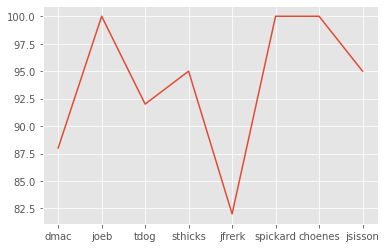

In [73]:
df1.plot()

<AxesSubplot:>

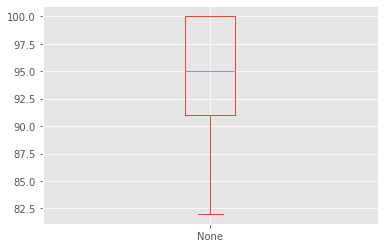

In [74]:
df1.plot(kind='box')

In [75]:
df1.loc['jfrerk']=75

<AxesSubplot:>

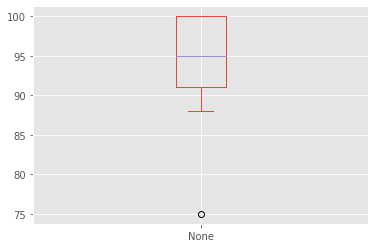

In [76]:
df1.plot(kind='box')

In [14]:
df_sal_exp = df_people.groupby('Gender')[['Salary']].mean()
df_sal_exp

,Salary
Gender,
Female,113366.093750
Male,117278.567308


<AxesSubplot:title={'center':'Salary Comparison'}, xlabel='Gender'>

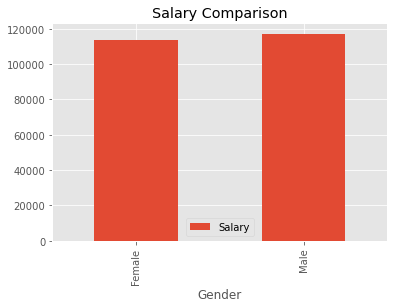

In [30]:
df_sal_exp.plot(kind='bar', title="Salary Comparison")

In [19]:
df_sal_exp.transpose()

Gender,Female,Male
Salary,113366.09375,117278.567308


<AxesSubplot:title={'center':' Salary Comparison'}, xlabel='Gender', ylabel='USD'>

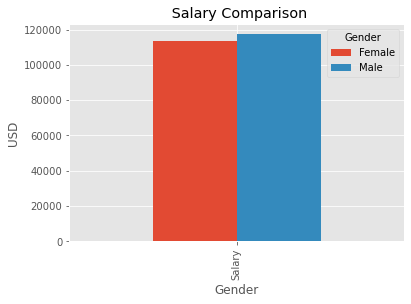

In [31]:
df_sal_exp.transpose().plot(kind='bar', title=' Salary Comparison', xlabel='Gender', ylabel = 'USD')

In [58]:
df_people.dtypes

First Name            object
Last Name             object
Gender                object
Age                    int64
Email                 object
Phone                 object
Education             object
Occupation            object
Experience (Years)     int64
Salary                 int64
Marital Status        object
Number of Children     int64
dtype: object

In [52]:
df_people['Salary'] = df_people['Salary'].astype(float)

<AxesSubplot:xlabel='Education'>

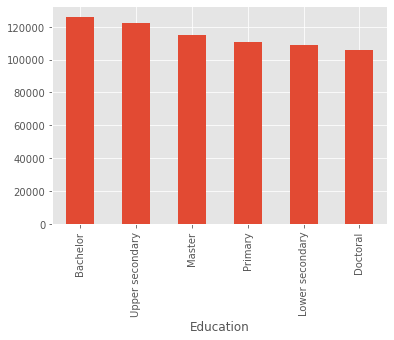

In [59]:
df_salary_education = df_people.groupby('Education')['Salary'].mean()
df_salary_education.sort_values(ascending=False).plot(kind='bar')

In [95]:
df_super.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [94]:
df_super['Date'] = pd.to_datetime(df_super['Date'])

In [88]:
df_super.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [104]:
df_super_qtr = df_super.resample('M', on='Date').sum()

In [105]:
df_super['Date'].max()

Timestamp('2019-03-30 00:00:00')

In [106]:
df_super_qtr.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-31,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2
2019-02-28,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6
2019-03-31,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9


<AxesSubplot:>

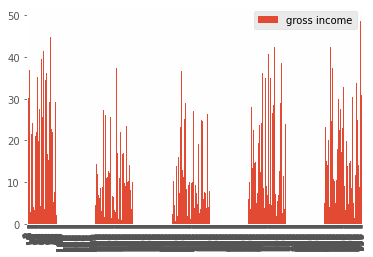

In [87]:
df_super[['Branch','gross income']].plot(kind='bar')

# Interacting with Excel, JSON, Parquet files, SQL

# Using Polars with Pandas

## 

# Initialize everything

This section is provided to quickly re-load the series and dataframe objects used in this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

grades = [88, np.NaN, 100, 92, None, 95, 82, 100, 100, 95]
grade_series = pd.Series(grades)

grades = [88, np.NaN, 100, 92, None, 95, 82, 100, 100, 95]
students = ['dmac', 'edev', 'joeb', 'tdog', 'txroy', 'sthicks', 'jfrerk', 'spickard', 'choenes', 'jsisson']
student_grades_series = pd.Series(grades, students)

df_people = pd.read_csv('files/people_data.csv')
small_df = df_people.iloc[:10,:].copy()
df_super = pd.read_csv('files/supermarket_sales.csv')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)